# Avaliação de Perfil de Clientes para Aprovação de Financiamento de Veículos
Nesse projeto, será desenvolvido um <b>modelo de machine learning</b> com o objetivo de prever e estipular valores aprovados para cada cliente para financiamento de carros. Serão utilizadas técnicas de <b>aprendizado supervisionado</b> com a separação de um dataset para treino e um para teste. Ao final do desenvolvimento do modelo será disponibilizada uma <b>interface gráfica</b> onde o Analista Financeiro, responsável pela simulação, preencherá as informações de cada cliente para serem analisadas.

Utilizarei a seguinte <b>pipeline</b> baseada no <b>CRISP-DM framework:</b>

<b>1. Definição do problema de negócio</b><br>
<b>2. Coletar e ter uma visão inicial dos dados</b><br>
<b>3. Divide os Datasets em treino e teste</b><br>
<b>4. Exploração de dados (EDA: exploratory data analysis)</b><br>
<b>5. Feature engineering, limpeza dos dados e processamento da base</b><br>
<b>6. Treinamento de modelos, comparar, selecionar as melhores features e hiperparâmetros</b><br>
<b>7. Seleção e treinamento do modelo com os melhores resultados</b><br>
<b>8. Conclusão e interpretação dos resultados do modelo final</b><br>
<b>9. Deploy</b><br>

Neste notebook, realizarei uma <b>análise exploratória de dados (EDA)</b>, cobrindo as etapas 1 a 4 do pipeline acima. O principal objetivo aqui é descobrir insights que nos forneçam <b>informações valiosas sobre os padrões dos clientes que solicitam o serviço dentro das características disponíveis</b>. Assim, mesmo antes de construir um modelo, será possível ajudar o banco a identificar perfis e tendências de clientes. Além disso, abordarei essas etapas em detalhes abaixo, explicando o motivo de cada decisão tomada.


# 1. Problema de negócio
- Dificuldade em classificar e determinar as aprovações dos valores de financiamento para cada cliente de acordo com as suas informações.

- O que é experado?
    - Quando um cliente entra na loja...
    - Evitar a análises incorretas ou inquerentes com os princípios do banco
    - Ajudar o Analista Financeiro a agregar sua tomada de decisão...

- Entrega final?

- Quais são os benefícios?

- Interface gráfica ao final do projeto

### Importando bibliotecas e arquivos necessários

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import boto3

from sklearn.model_selection import train_test_split

import const
from utils import *

# Configurações de linhas e colunas
pd.get_option("display.max_rows")
pd.get_option("display.max_columns")

# Exibe gráficos direto no notebook
%matplotlib inline

# Aplica estilo dos gráficos
mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor'] = 'white'      # Fundo dos gráficos branco
mpl.rcParams['axes.linewidth'] = 1            # Espessura das bordas dos eixos
mpl.rcParams['xtick.color'] = 'black'         # Cor dos ticks do eixo X
mpl.rcParams['ytick.color'] = 'black'         # Cor dos ticks do eixo Y
mpl.rcParams['grid.color'] = 'lightgray'      # Cor da grade (linhas de fundo)
mpl.rcParams['figure.dpi'] = 150              # Resolução das figuras (DPI)
mpl.rcParams['axes.grid'] = True              # Ativa a grade no gráfico
mpl.rcParams['font.size'] = 12                # Tamanho da fonte

# Palette Setting
color_palette = ['#FFD700', '#9400D3', '#FFFF00', '#8A2BE2', '#F0E68C', '#EE82EE']
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(1.0, 0.8431372549019608, 0.0),
 (0.5803921568627451, 0.0, 0.8274509803921568),
 (1.0, 1.0, 0.0),
 (0.5411764705882353, 0.16862745098039217, 0.8862745098039215),
 (0.9411764705882353, 0.9019607843137255, 0.5490196078431373),
 (0.9333333333333333, 0.5098039215686274, 0.9333333333333333)]

# 2. Entendendo os dados
- O Dataset não é público e possue acesso através da função chamada <b>fetch_data_from_db</b> encontrada no arquivo <b>Utils.py</b>.
- Os dados são consultados através da conexão utilizando o psycopg2, e a query para seleção dos dados.

In [8]:
df = fetch_data_from_db()

In [9]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Dicionário de dados
1. profissao: descrição da coluna
2. tempoprofissao
3. renda
4. tiporesidencia
5. escolaridade
6. score
7. idade
8. dependentes
9. estadocivil
10. produto
11. valorsolicitado	
12. valortotalbem
<b>Target: </b>
classe

In [50]:
df.shape

(150, 13)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   profissao        147 non-null    object 
 1   tempoprofissao   150 non-null    int64  
 2   renda            150 non-null    float64
 3   tiporesidencia   147 non-null    object 
 4   escolaridade     150 non-null    object 
 5   score            150 non-null    object 
 6   idade            150 non-null    float64
 7   dependentes      150 non-null    int64  
 8   estadocivil      150 non-null    object 
 9   produto          150 non-null    object 
 10  valorsolicitado  150 non-null    object 
 11  valortotalbem    150 non-null    object 
 12  classe           150 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 15.4+ KB


Alguns valores que deveriam ter formato numérico estão como objétos, então é necessária essa correção para futuras análises.

In [52]:
df['idade'] = df['idade'].astype(int)
df['valorsolicitado'] = df['valorsolicitado'].astype(float)
df['valortotalbem'] = df['valortotalbem'].astype(float)

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tempoprofissao,150.0,6690.573333,81647.612861,0.0,13.00,24.0,32.75,999999.0
renda,150.0,36406.813333,12974.282533,7814.0,24271.75,35795.0,46361.00,59976.0
idade,150.0,47.800000,20.003020,22.0,36.00,47.0,58.00,224.0
dependentes,150.0,0.980000,0.993063,0.0,0.00,1.0,2.00,4.0
valorsolicitado,150.0,144512.680000,113913.175165,28290.0,69172.00,123258.0,170513.75,800000.0
valortotalbem,150.0,375161.993333,178933.034924,31170.0,280000.00,320000.0,400000.00,800000.0


Insights observados:

1. Coluna <b>idade</b> possui valor máximo de 224, pode indicar <b>outliers</b>.
2. Coluna de **tempodeprofissão** possui valor máximo de 999999.0, indicando **outliers**.
3. Verificar com área de negócios se o valor máximo das colunas **valorsolicitado** e **valortotalbem** estão corretos, pois ambos estão muito acima do **Desvio Padrão** e da **Média** dos demais valores.

Dados faltantes ou duplicados.


In [54]:
df.isnull().sum()

profissao          3
tempoprofissao     0
renda              0
tiporesidencia     3
escolaridade       0
score              0
idade              0
dependentes        0
estadocivil        0
produto            0
valorsolicitado    0
valortotalbem      0
classe             0
dtype: int64

In [55]:
df['profissao'].unique()

array(['Cientista de Dados', 'Empresário', 'Dentista', 'Engenheiro',
       'Contador', 'Arquiteto', 'Programador', 'Advogado', None, 'Adv.',
       'Médico', 'Dent.'], dtype=object)

Valores únicos apresentam abreviações ou erro de digitação na coluna **profissao**.

- Chamar a função **corrigir_erros_digitacao** criada para, através da biblioteca **FuzzyWuzzy**, achar valores com similaridade e substituir pelo valor correspondente na lista de valores corretos. 

In [56]:
profissoes_corretas = ['Cientista de Dados', 'Empresário', 'Dentista', 'Engenheiro',
       'Contador', 'Arquiteto', 'Programador', 'Advogado', 'Médico']

corrigir_erros_digitacao(df, 'profissao', profissoes_corretas)

Tratar nulos através da função **substitui_nulos** do aquivo **Utils.py**.

In [57]:
substitui_nulos(df)

c:\Users\vinic\Desktop\Data Science\Machine-Learning-Consessao-de-Credito\utils.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(moda, inplace=True)
c:\Users\vinic\Desktop\Data Science\Machine-Learning-Consessao-de-Credito\utils.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Coluna produto realmente é necessária? 
- A análise será feita com a matriz de correlação

In [ ]:
# Exclui coluna
# df.drop(columns=['produto'], inplace=True)

In [59]:
# Confirma que todas as colunas estão minusculas
df.columns = [x.lower() for x in df.columns]

In [60]:
# Renomeia coluna classe para churn_flag
df.rename(columns={'classe': 'churn_flag'}, inplace=True)

# 3. Divide os Datasets em treino e teste

### Variáveis Categóricas

In [61]:
variaveis_categoricas = ['profissao', 'tiporesidencia', 
                         'escolaridade', 'score', 'estadocivil', 'produto']
variaveis_numericas = ['tempoprofissao', 'renda', 'idade',
                        'dependentes', 'valorsolicitado', 'valortotalbem']

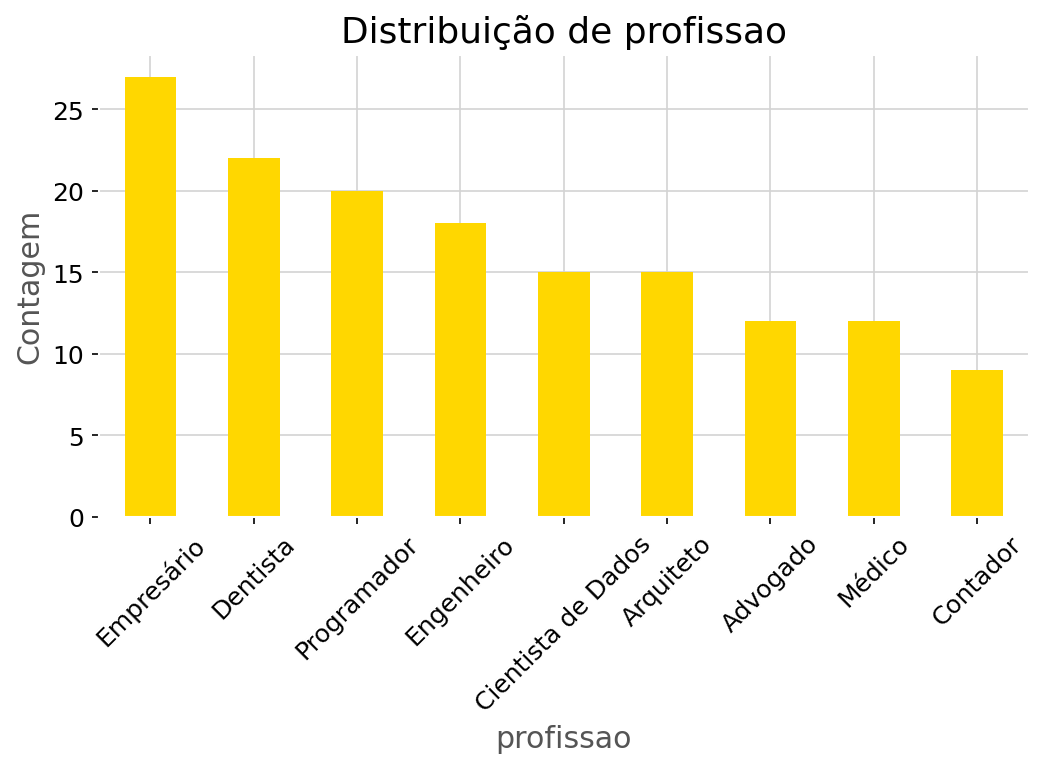

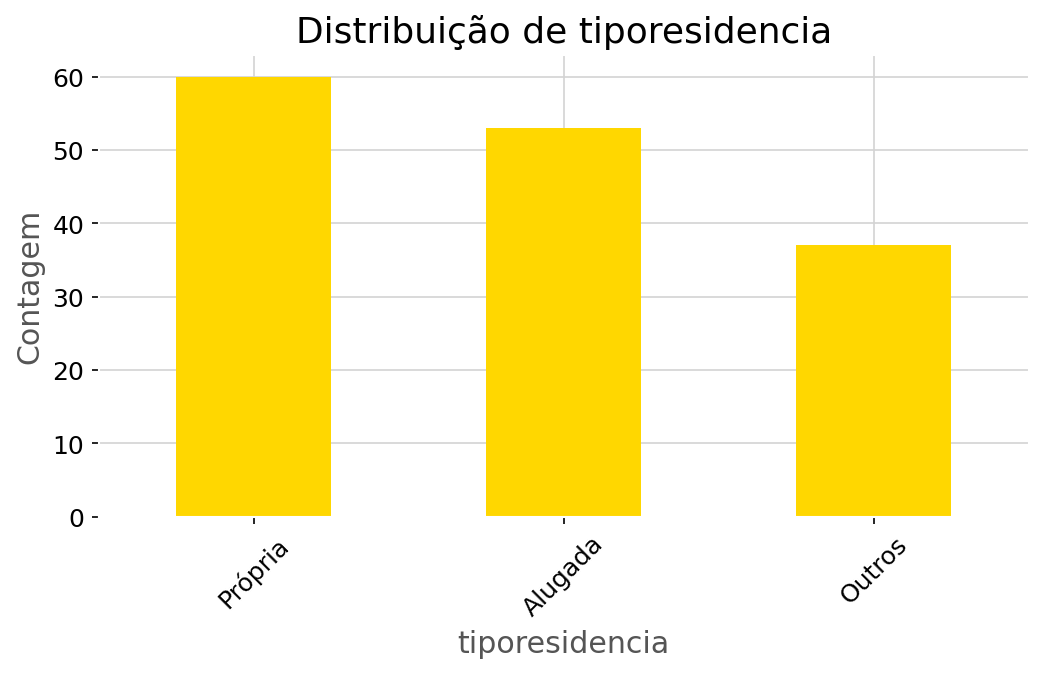

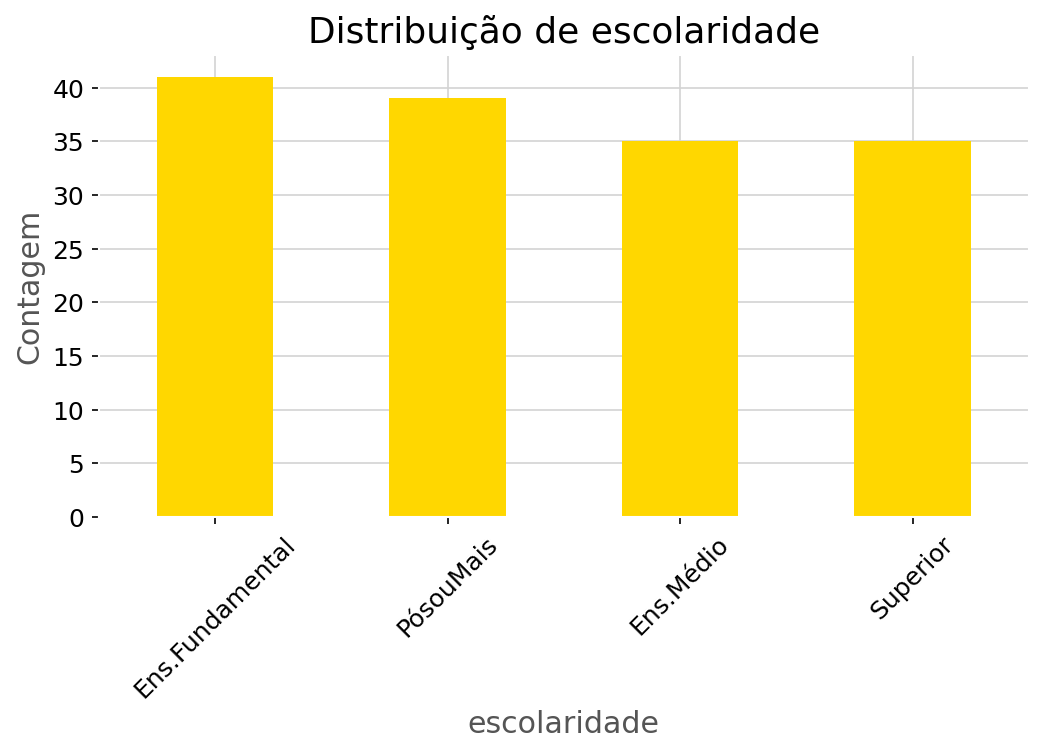

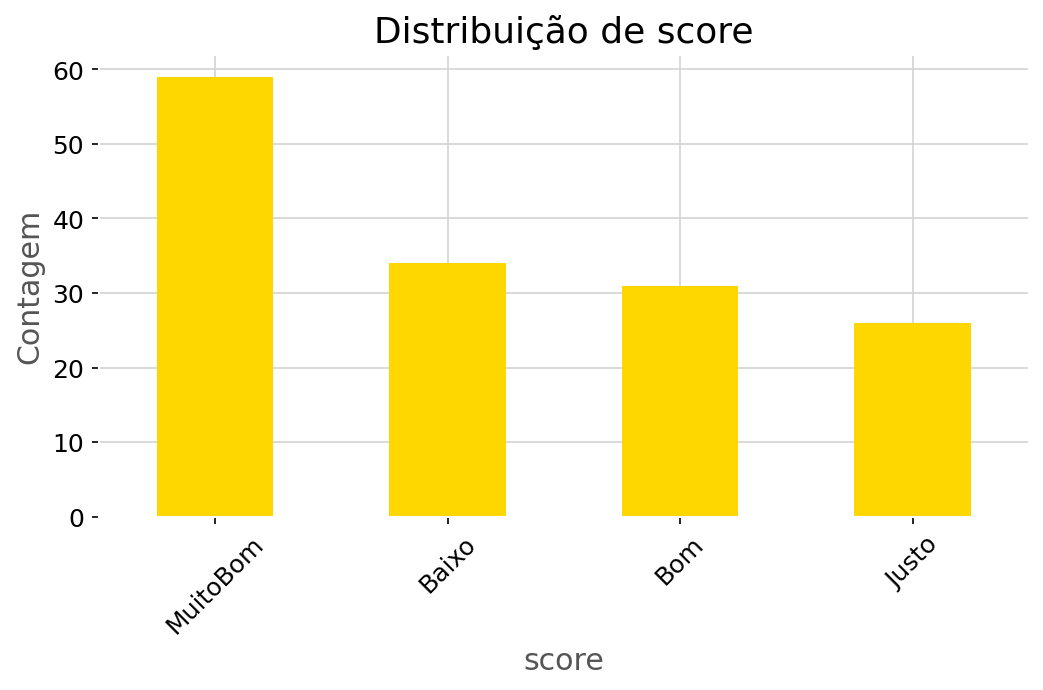

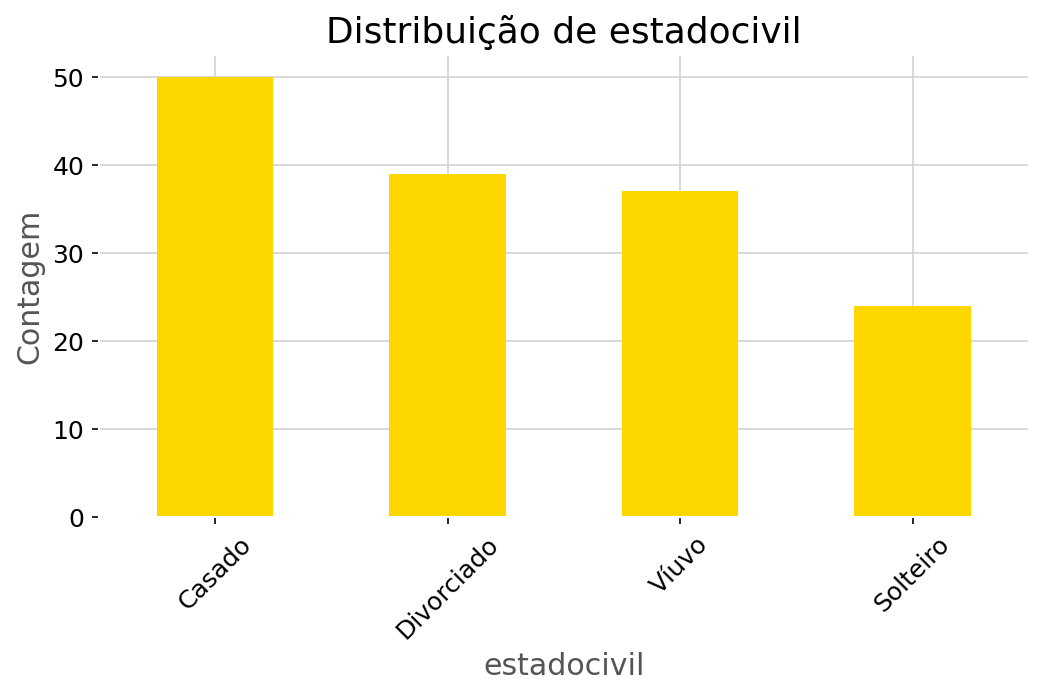

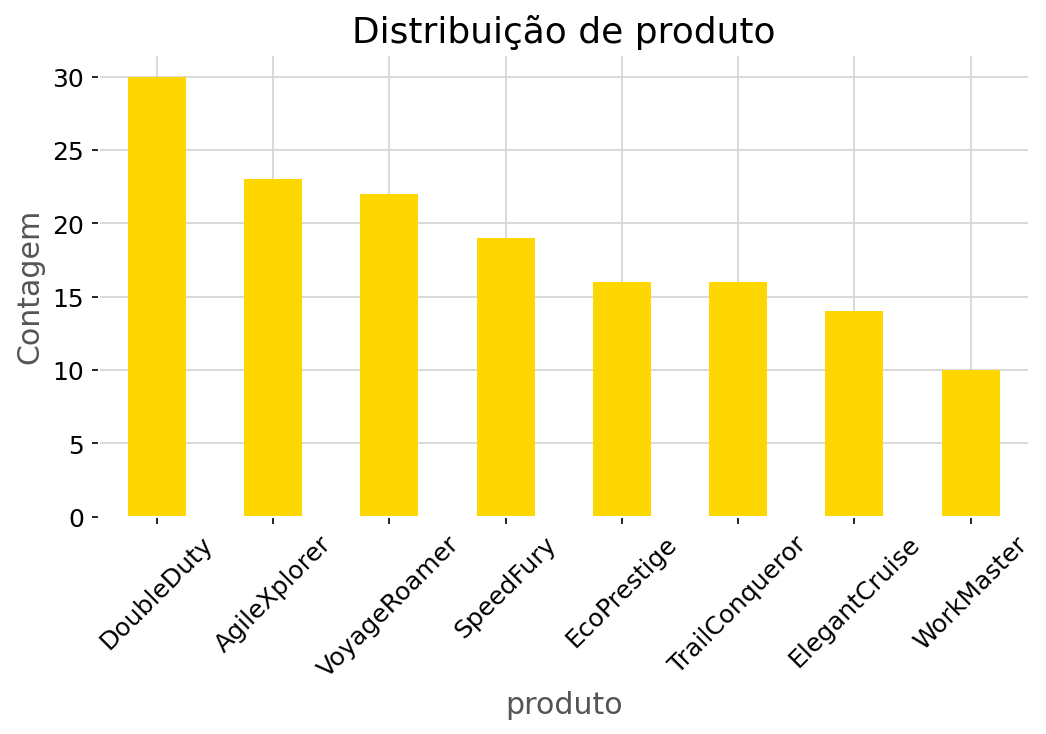

In [62]:
for coluna in variaveis_categoricas:
    df[coluna].value_counts().plot(kind='bar', figsize=(8, 4))
    plt.title(f'Distribuição de {coluna}')
    plt.ylabel('Contagem')
    plt.xlabel(coluna)
    plt.xticks(rotation=45)
    plt.show()

### Variáveis numéricas

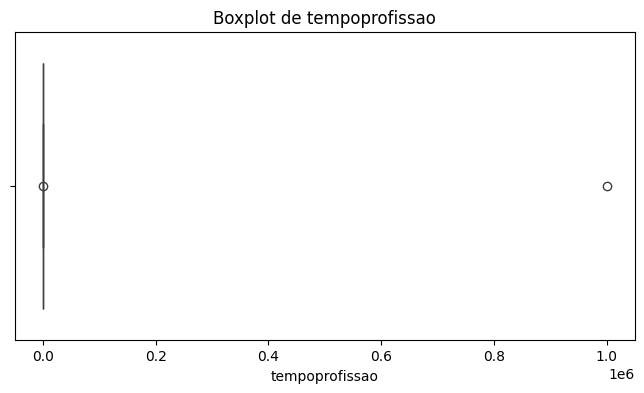

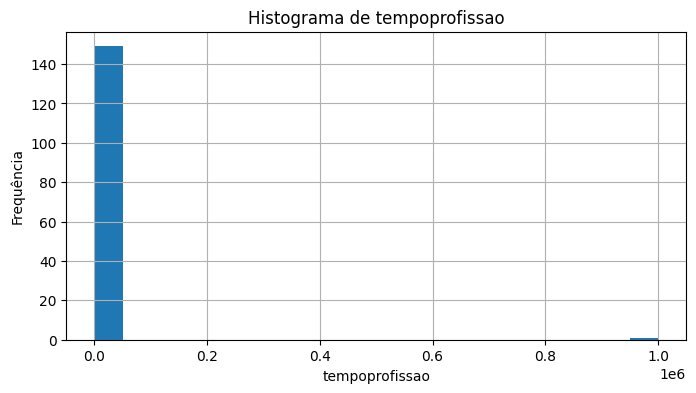

Resumo estatístico de :
 count       150.000000
mean       6690.573333
std       81647.612861
min           0.000000
25%          13.000000
50%          24.000000
75%          32.750000
max      999999.000000
Name: tempoprofissao, dtype: float64 



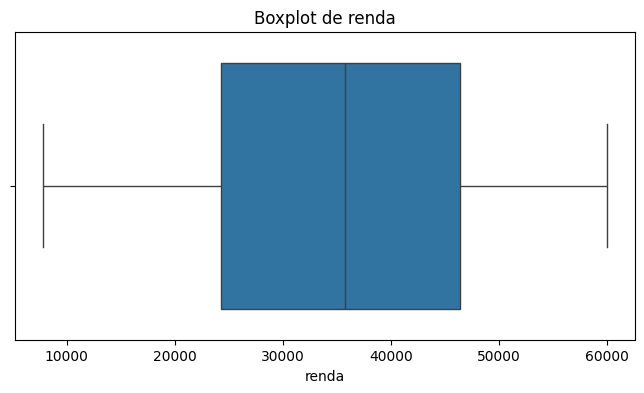

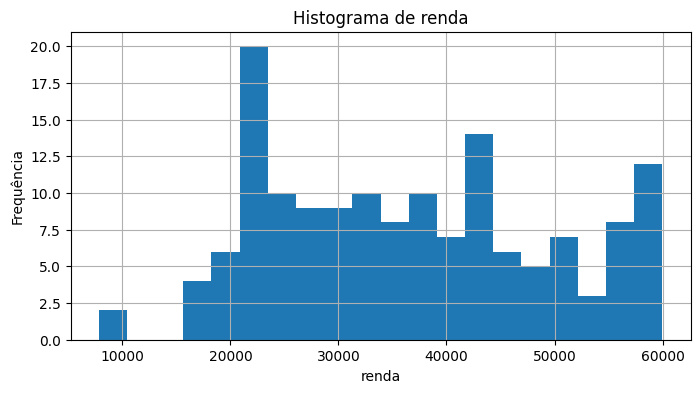

Resumo estatístico de :
 count      150.000000
mean     36406.813333
std      12974.282533
min       7814.000000
25%      24271.750000
50%      35795.000000
75%      46361.000000
max      59976.000000
Name: renda, dtype: float64 



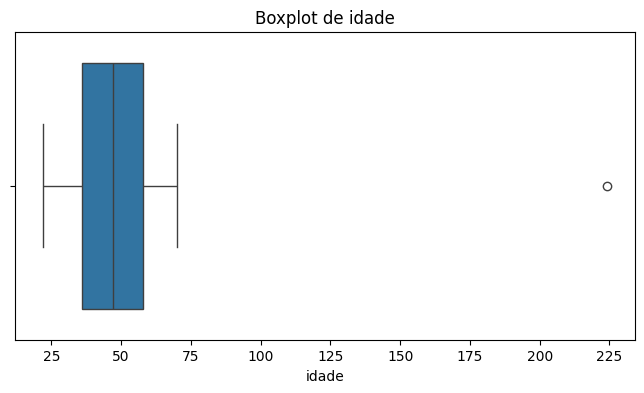

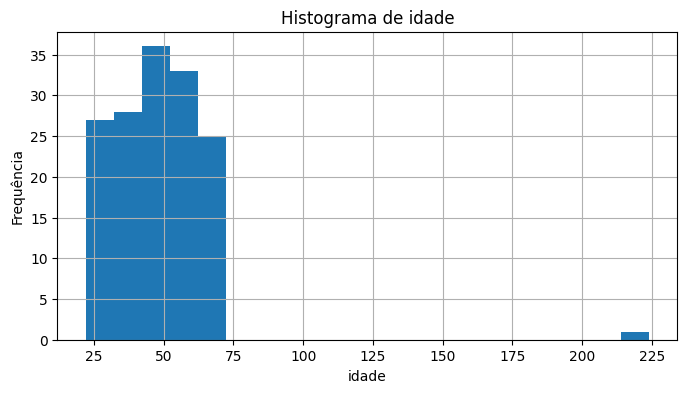

Resumo estatístico de :
 count    150.000000
mean      47.766667
std       19.992756
min       22.000000
25%       36.000000
50%       47.000000
75%       58.000000
max      224.000000
Name: idade, dtype: float64 



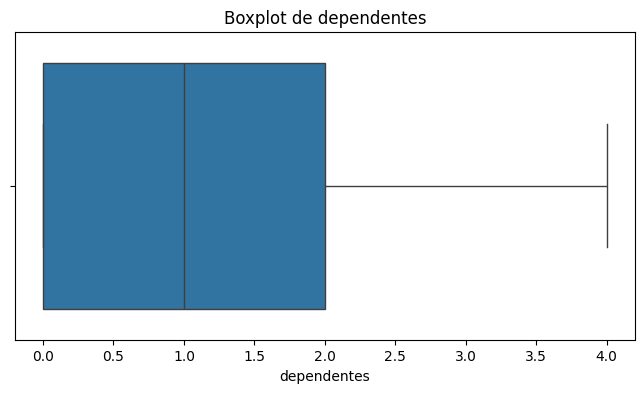

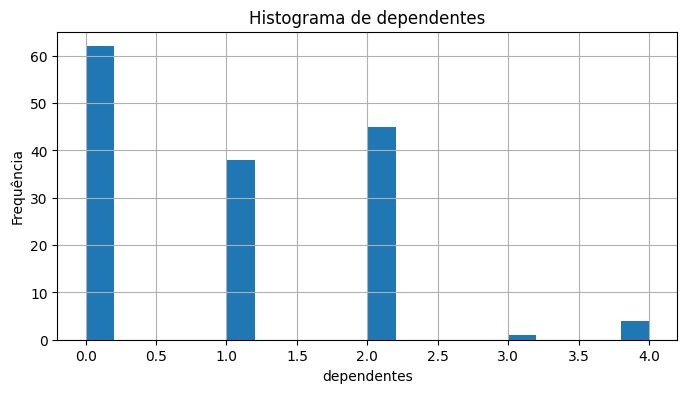

Resumo estatístico de :
 count    150.000000
mean       0.980000
std        0.993063
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: dependentes, dtype: float64 



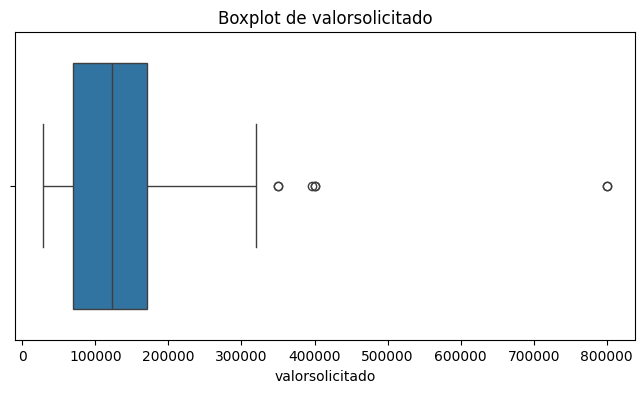

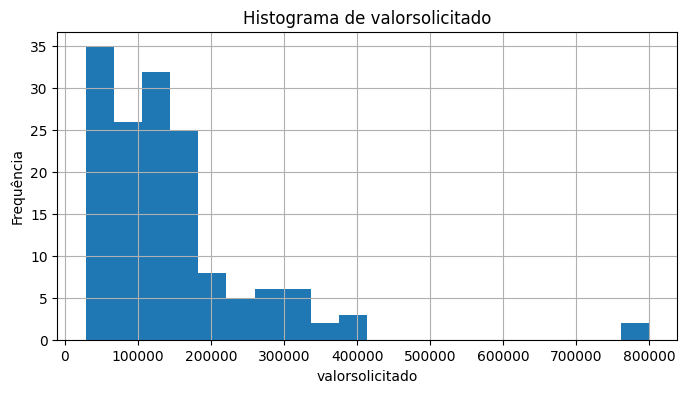

Resumo estatístico de :
 count       150.000000
mean     144512.680000
std      113913.175165
min       28290.000000
25%       69172.000000
50%      123258.000000
75%      170513.750000
max      800000.000000
Name: valorsolicitado, dtype: float64 



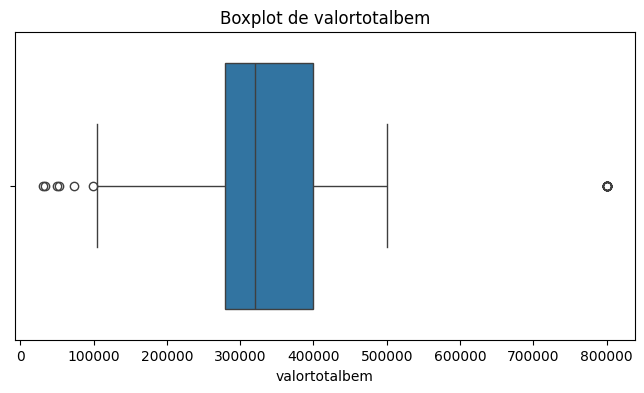

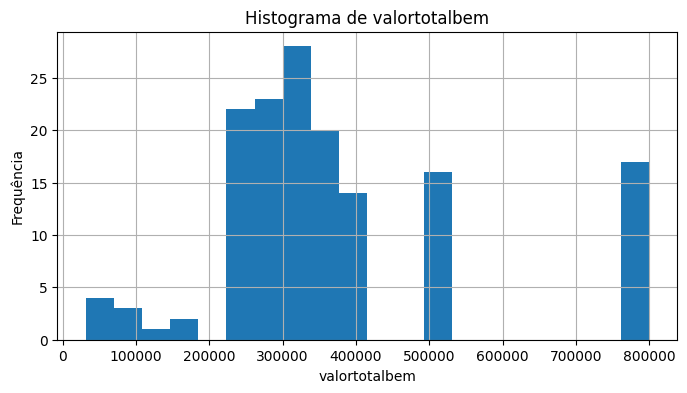

Resumo estatístico de :
 count       150.000000
mean     375161.993333
std      178933.034924
min       31170.000000
25%      280000.000000
50%      320000.000000
75%      400000.000000
max      800000.000000
Name: valortotalbem, dtype: float64 



In [7]:
for coluna in variaveis_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=coluna)
    plt.title(f'Boxplot de {coluna}')
    plt.show()

    df[coluna].hist(bins=20, figsize=(8, 4))
    plt.title(f'Histograma de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.show()

    print(f'Resumo estatístico de :\n', df[coluna].describe(), '\n')

### Tratamento de nulos

In [65]:
nulos_por_coluna = df.isnull().sum()
print(nulos_por_coluna)

profissao          3
tempoprofissao     0
renda              0
tiporesidencia     3
escolaridade       0
score              0
idade              0
dependentes        0
estadocivil        0
produto            0
valorsolicitado    0
valortotalbem      0
classe             0
dtype: int64


In [ ]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['attrition_flag'] = df['attrition_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})